In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pod_rbf

print("using version: {}".format(pod_rbf.__version__))

Re = np.linspace(0, 1000, num=11)
Re[0] = 1

coords_path = "data/train/re-0001.csv"
x, y = np.loadtxt(
    coords_path,
    delimiter=",",
    skiprows=1,
    usecols=(1, 2),
    unpack=True,
)

# make snapshot matrix from csv files
train_snapshot = pod_rbf.buildSnapshotMatrix(
    "data/train/re-%.csv"
)


Loading snapshot .csv files:  64%|██████▎   | 7/11 [00:00<00:00, 61.61it/s]using version: 1.2.1
data/train
Loading snapshot .csv files: 100%|██████████| 11/11 [00:00<00:00, 60.38it/s]


Energy kept after truncating = 0.9212634763763742%
Average Percent Error = 0.011920987778464667


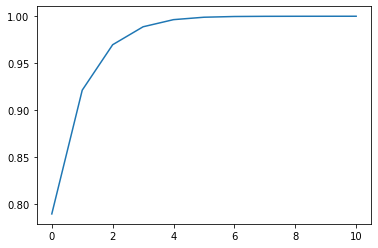

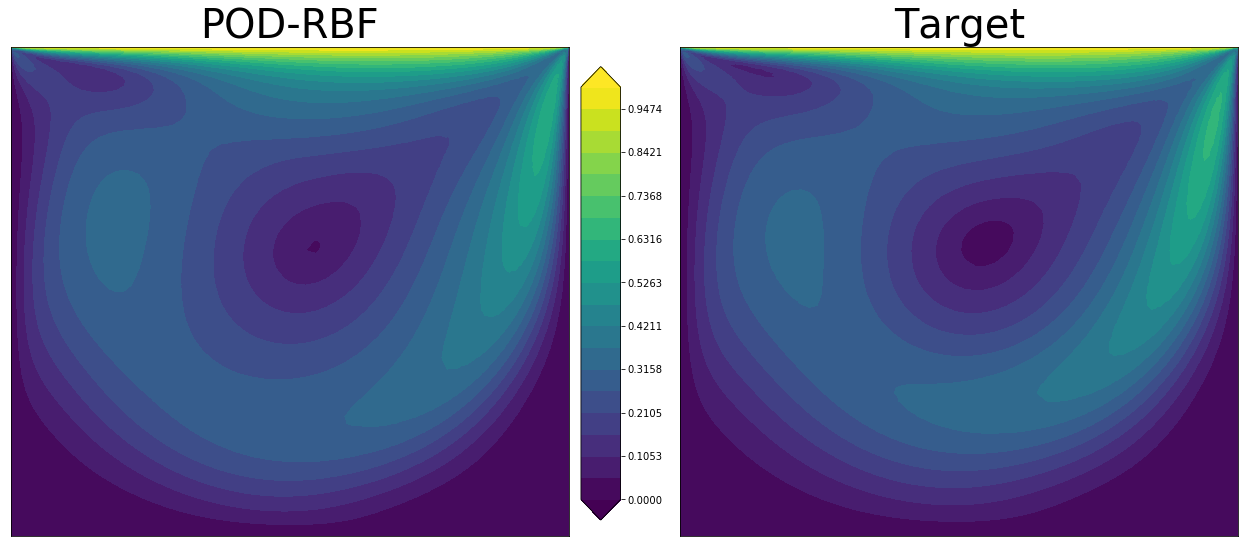

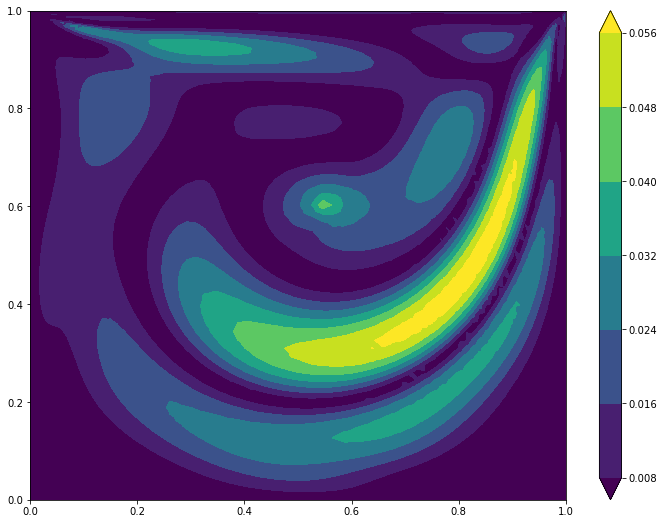

In [2]:

# load validation
val = np.loadtxt(
    "data/validation/re-0450.csv",
    # "data/validation/re-0050.csv",
    delimiter=",",
    skiprows=1,
    usecols=(0),
    unpack=True,
)

model = pod_rbf.pod_rbf(energy_threshold=0.9)  # create model object
model.train(train_snapshot, Re)  # train the model
print("Energy kept after truncating = {}%".format(model.truncated_energy))

# plot the energy decay
plt.plot(model.cumul_energy)


sol = model.inference(450)  # inference the model on an unseen parameter

# calculate and plot the difference between inference and actual
diff = np.nan_to_num(np.abs(sol - val))
print("Average Percent Error = {}".format(np.mean(diff)))

# plot the inferenced solution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 9))
ax1.set_title("POD-RBF", fontsize=40)
cntr1 = ax1.tricontourf(
    x, y, sol, levels=np.linspace(0, 1, num=20), cmap="viridis", extend="both"
)
ax1.set_xticks([])
ax1.set_yticks([])
# plot the actual solution
ax2.set_title("Target", fontsize=40)
cntr2 = ax2.tricontourf(
    x, y, val, levels=np.linspace(0, 1, num=20), cmap="viridis", extend="both"
)
cbar_ax = fig.add_axes([0.485, 0.15, 0.025, 0.7])
fig.colorbar(cntr2, cax=cbar_ax)
ax2.set_xticks([])
ax2.set_yticks([])
# fig.tight_layout()

fig2, ax = plt.subplots(1, 1, figsize=(12, 9))
cntr = ax.tricontourf(x, y, diff, cmap="viridis", extend="both")
fig2.colorbar(cntr)
plt.show()